In [1]:
from rateslib import *

In [ ]:
usd = IndexCurve(
           nodes={
               dt(2022, 1, 1): 1.0,
               dt(2027, 1, 1): 0.85,
               dt(2032, 1, 1): 0.70,
           },
           id="usd",
           index_base=100,
           index_lag=3,
       )

In [ ]:
usd

In [ ]:
zcis = ZCIS(
           effective=dt(2022, 1, 1),
           termination="10Y",
           frequency="Q",
           calendar="nyc",
           currency="usd",
           fixed_rate=4.0,
           convention="1+",
           notional=100e6,
           index_base=100.0,
           index_method="monthly",
           index_lag=3,
           index_fixings=None,
           curves=["usd"],
       )

In [ ]:
zcis.cashflows(usd)

In [ ]:
zcis.npv(usd)

In [ ]:
zcis.rate(usd)

In [ ]:
zcis.fixed_rate = 3.5826

In [ ]:
zcis.npv(usd)

In [ ]:
zcis.cashflows(usd)

In [ ]:
zcis.rate(usd)

In [10]:
sofr = Curve({dt(2022, 1, 1): 1.0, dt(2032, 1, 1): 0.99, dt(2042, 1, 1):0.98})
us_cpi = IndexCurve({dt(2022, 1, 1): 1.0, dt(2032, 1, 1):0.99, dt(2042, 1, 1):0.98}, index_base=100.0)
instruments = [
    IRS(dt(2022, 1, 1), "10y", "A", curves=sofr),
    IRS(dt(2022, 1, 1), "20y", "A", curves=sofr),
    ZCIS(dt(2022, 1, 1), "10y", "A", convention="1+", curves=[us_cpi, sofr]),
    ZCIS(dt(2022, 1, 1), "20y", "A", convention="1+", curves=[us_cpi, sofr]),
]
s = [3.5, 2.5, 2.5, 2.0]
solver = Solver(
    curves=[us_cpi, sofr],
    instruments=instruments,
    s=s,
)
    

SUCCESS: `func_tol` reached after 4 iterations (gauss_newton) , `f_val`: 3.8399800919960564e-16, `time`: 0.0755s


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: >,
 [<matplotlib.lines.Line2D at 0x11d2b88d0>])

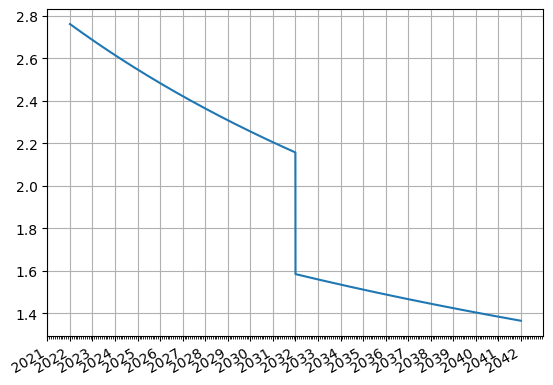

In [11]:
us_cpi.plot("1d")

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: >,
 [<matplotlib.lines.Line2D at 0x11d474590>])

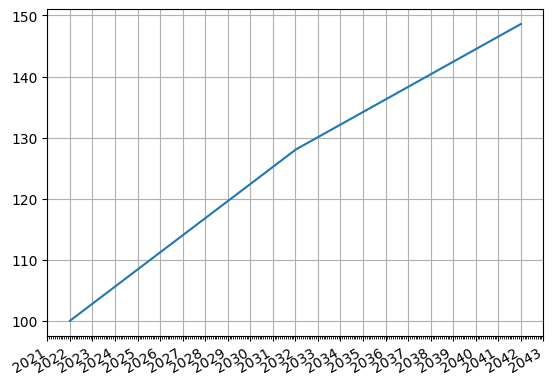

In [12]:
us_cpi.plot_index()

In [4]:
ZCIS(dt(2022, 1, 1), "20y", "A", convention="1+").cashflows(curves=[us_cpi, sofr])

,,Type,Period,Ccy,Acc Start,Acc End,Payment,Convention,DCF,Notional,DF,Rate,Spread,Cashflow,NPV,FX Rate,NPV Ccy,Real Cashflow,Index Val,Index Ratio
leg1,0,ZeroFixedLeg,None,USD,2022-01-01,2042-01-01,2042-01-01,1+,20.0,1000000.0,0.622446,NaN,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN
leg2,0,ZeroIndexLeg,None,USD,2022-01-01,2042-01-01,2042-01-01,1,1.0,-1000000.0,0.622446,100.0,None,485947.396115,302476.239523,1.0,302476.239523,1000000.0,148.59474,1.485947


In [5]:
us_cpi.nodes

{datetime.datetime(2022, 1, 1, 0, 0): <Dual: 1.000000, ('95d6f_0',), [1.]>,
 datetime.datetime(2032, 1, 1, 0, 0): <Dual: 0.781198, ('95d6f_1',), [1.]>,
 datetime.datetime(2042, 1, 1, 0, 0): <Dual: 0.672971, ('95d6f_2',), [1.]>}